In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times'], 'size':12})
rc('text', usetex=True)
import sys 
sys.path.append("C:/APPS/MiKTeX/21.7/fonts/source/public/rsfs")

In [5]:
def plot_storage_equivalent_germany_stacked(
        storage_equivalent,
        parameter={"scenario": "Deutschland"},
        ylabel="Gespeicherte Energie [GWh]",
        figsize=(5, 3),
        loc="upper left",
        append="three_storage",
        ylim=None,
        language="english",
        save_dir=None
):
    param = list(parameter.items())[0][0]
    xlabel = list(parameter.items())[0][1]
    
    
    if (language == "german") or (language == "deutsch"):
        type_dict = {0: "Tag", 1: "Woche", 2: "Saisonal"}
    else:
        type_dict = {0: "Day", 1: "Week", 2: "Seasonal"}
    fig, ax = plt.subplots(figsize=figsize)
    colors = matplotlib.cm.get_cmap("Blues")
    for storage_type in range(storage_equivalent.storage_type.max()+1):

        plot_df = pd.DataFrame(index=storage_equivalent[param].unique())
        plot_df[ylabel] = storage_equivalent.loc[
            storage_equivalent.storage_type >= storage_type].groupby(
            param).sum().energy_stored.divide(1e3)
        plot_df[xlabel] = storage_equivalent[param].unique()

        sns.barplot(x=xlabel, y=ylabel, color=colors(1.0-0.3*storage_type),
                    data=plot_df, ax=ax, label=type_dict[storage_type])
    if loc is not None:
        plt.legend(loc=loc)#loc="lower left"
    if ylim is not None:
        # ax.get_ylim()
        ax.set_ylim(ylim)
    if param in ["nr_ev"]:
        xticklabels = ax.get_xticklabels()
        ax.set_xticklabels([int(float(tick.get_text())) for tick in xticklabels])
    plt.tight_layout()
    if save_dir is not None:
        plt.savefig(save_dir)
    plt.show()

In [9]:
def load_scenarios_and_diff(scenario_ref, scenario_flex, variation_parameter):
    """
    Method to load storage equivalents of reference (inflexible) and flexible scenario and calculate 
    growth for reference scneario and difference between reference and flexible scenario.
    """
    # load reference scenario
    storage_equivalent_ref = pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario_ref),
        index_col=0)
    # calculate growth
    growth = storage_equivalent_ref.copy()
    ref = storage_equivalent_ref.loc[getattr(storage_equivalent_ref, variation_parameter) == 0]
    for val in getattr(storage_equivalent_ref, variation_parameter).unique():
        tmp = storage_equivalent_ref.loc[getattr(storage_equivalent_ref, variation_parameter) == val]
        growth.loc[tmp.index, "energy_stored"] = \
            tmp["energy_stored"].values-ref["energy_stored"].values
    # load flexible scenario
    storage_equivalent_flex = pd.read_csv(
        "results/{}/storage_equivalents.csv".format(scenario_flex),
        index_col=0)
    # calculate difference between flexible and reference operation
    diff = storage_equivalent_flex.copy()
    diff["energy_stored"] = storage_equivalent_flex["energy_stored"] - \
                            storage_equivalent_ref["energy_stored"]
    return storage_equivalent_ref, growth, storage_equivalent_flex, diff

In [11]:
storage_equivalent_ref, growth, storage_equivalent_flex, diff=load_scenarios_and_diff("HP_reference", "double_TES", "nr_hp")

In [12]:
storage_equivalent_ref

,storage_type,energy_stored,nr_hp,nr_ev
0,0,40807.899707,0.0,0.0
1,1,37846.959224,0.0,0.0
2,2,53185.359780,0.0,0.0
3,0,42325.542896,2.5,0.0
4,1,38119.121647,2.5,0.0
5,2,55601.810169,2.5,0.0
6,0,43585.537392,5.0,0.0
7,1,38358.096086,5.0,0.0
8,2,58478.830435,5.0,0.0
9,0,44721.531575,7.5,0.0


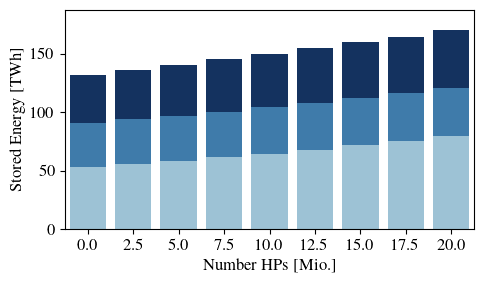

In [17]:
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent_ref,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            append="three_storage_flexible",
            ylim=(0, 187.29552),
            language=language
        )

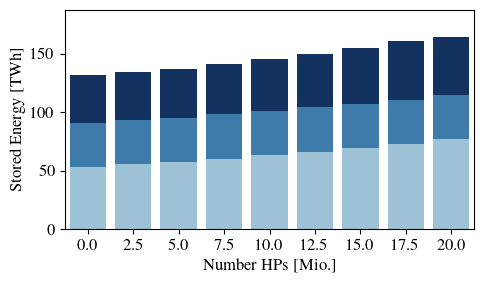

In [18]:
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent_flex,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            append="three_storage_flexible",
            ylim=(0, 187.29552),
            language=language
        )

In [67]:
def plot_storage_equivalent_germany_stacked_four(
        storage_equivalent_ref, growth, storage_equivalent_flex, diff,
        parameter={"scenario": "Deutschland"},
        ylabel="Stored Energy [TWh]",
        ylabel1="Change in Stored Energy [TWh]",
        figsize=(8, 6),
        ylim=None,
        language="english",
        save_dir=None
):
    param = list(parameter.items())[0][0]
    xlabel = list(parameter.items())[0][1]
    
    
    axes_dict = {(0,0): {"title": "Reference Operation", "values": storage_equivalent_ref, "ylim": 0},
                (0,1): {"title": "Optimised Operation", "values": storage_equivalent_flex, "ylim": 0},
                (1,0): {"title": "Growth Reference Operation", "values": growth, "ylim": 1},
                (1,1): {"title": "Reduction Optimised Operation", "values": diff, "ylim": 2}}
    
    if (language == "german") or (language == "deutsch"):
        type_dict = {0: "Tag", 1: "Woche", 2: "Saisonal"}
    else:
        type_dict = {0: "Day", 1: "Week", 2: "Seasonal"}
    fig, axes = plt.subplots(2,2,figsize=figsize)
    colors = matplotlib.cm.get_cmap("Blues")
    for ax in axes_dict.keys():
        storage_equivalent = axes_dict[ax]["values"]
        for storage_type in range(storage_equivalent.storage_type.max()+1):

            plot_df = pd.DataFrame(index=storage_equivalent[param].unique())
            for val in storage_equivalent[param].unique():
                tmp = storage_equivalent.loc[(storage_equivalent[param] == val)&
                                            (storage_equivalent.storage_type >= storage_type)&
                                            (np.sign(storage_equivalent.energy_stored) == np.sign(storage_equivalent.loc[
                                                (storage_equivalent[param] == val)&
                                                (storage_equivalent.storage_type == storage_type), "energy_stored"
                                            ].values[0]))]
                plot_df.loc[val, ylabel] = tmp.energy_stored.sum()/1e3
            plot_df[xlabel] = storage_equivalent[param].unique()

            sns.barplot(x=xlabel, y=ylabel, color=colors(1.0-0.3*storage_type),
                        data=plot_df, ax=axes[ax], label=type_dict[storage_type])
        axes[ax].set_title(axes_dict[ax]["title"])
        if ax == (1,1):
            axes[ax].legend(loc="lower left")#loc="lower left"
        if ylim is not None:
            axes[ax].set_ylim(ylim[axes_dict[ax]["ylim"]])
        if (ax==(0,1)) or (ax==(1,1)):
            axes[ax].set_ylabel("")
        elif ax==(1,0):
            axes[ax].set_ylabel(ylabel1)
        if (ax==(0,0)) or (ax==(0,1)):
            axes[ax].set_xlabel("")
            axes[ax].set_xticklabels([])
        else:
            if param in ["nr_ev"]:
                xticklabels = axes[ax].get_xticklabels()
                axes[ax].set_xticklabels([int(float(tick.get_text())) for tick in xticklabels])
    plt.tight_layout()
    if save_dir is not None:
        plt.savefig(save_dir)
    plt.show()

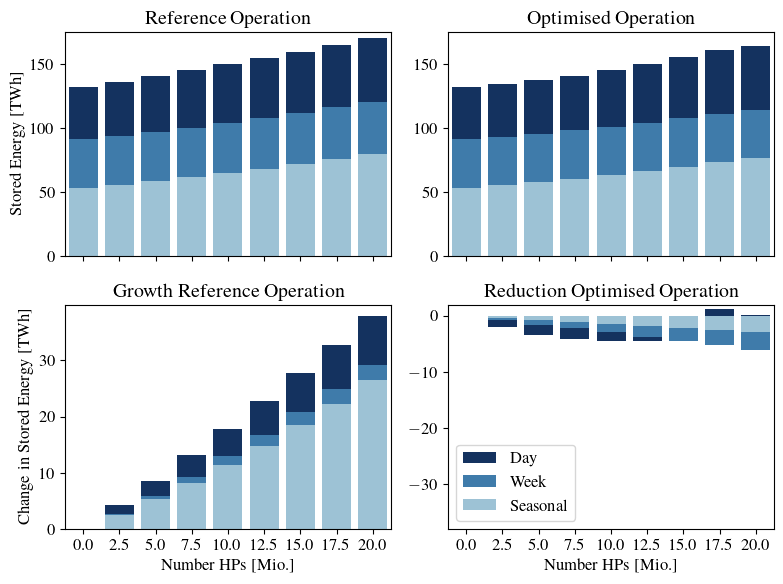

In [68]:
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked_four(storage_equivalent_ref, growth, storage_equivalent_flex, diff,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylim = [(0, 175), (0.0, 39.863), (-39.863+1.898, 1.898)])